<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Applied-Science-Bootcamp/blob/main/Hands%20On/Dia%205/Transporte_de_Neutrones_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

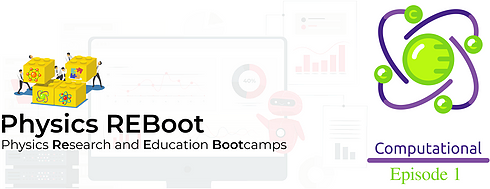

<h1>Physics Research and Education Bootcamp - Computational | Episode 1<h1>

License: CC BY-NC-SA  https://creativecommons.org/licenses/by-nc-sa/4.0/

Last Modification: Sept. 3, 2021

# ***Preambulo***

Primero carguemos los paquetes de Python necesarios para trabajar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# **Transporte de Neutrones con *Montecarlo***

Hoy aprenderemos como usar el método Montecarlo para estudiar propiedades estadísticas de sistemas con muchas partículas. El procedimiento usado aquí puede ser empleado en otras áreas. Lo importante es tener en mente la clase de conclusiones que pueden obtenerse a través de Montecarlo y su manera de implementación. 

# **Teoría**

El problema del transporte de neutrones dentro de un medio es sumamente complejo. Formalmente se puede describir la evolución de un sistema de muchas particulas a traves de la ecuación de Boltzmann, una ecuación diferencial que toma en cuenta el medio en el cual los neutrones se encuentran, su posición, velocidad y momento angular. 

\\

Una manera de solucionar este problema es a traves de la aproximación de difusión. En vez de considerar cada párticula de manera independiente, en la ecuación de difusión se aproxima el conjunto de neutrones como un "gas de neutrones". De esta manera se puede describir el comportamiento global del ensamble en términos de propiedades estadísticas como el ***camino libre medio*** o ***longitud de difusión***. Esta ecuación se conoce como la ***Ecuación de Difusión***:
\begin{align}
D\Delta\phi - \Sigma_a\phi = \dfrac{1}{v}\dfrac{d\phi}{dt}
\end{align}
\\

En esta descripción, hablamos de la ***Densidad de Flujo de Neutrones*** ($\phi$), la velocidad media ($v$) , el coeficiente de difusión ($D$) y la sección eficaz macroscópica de absorción ($\Sigma_a$).

\\
Esta ecuación tiene varias soluciones, dependiendo de la geometría y el medio de difusiónn. Hoy nos enfocaremos en medios multiplicadores, es decir, medios en los cuales el número de neutrones aumenta con el tiempo. En este caso, es necesario agregar un término a la ecuaciún para tomar en cuenta la producción de neutrones. 

Este mecanismo de producción es la fisión nuclear, y denotamos por $\sigma_f$ la probabilidad de que un neutrón produzca una fisión por unidad de area. Si tomamos en cuenta la densidad del medio, podemos transformar esta cantidad en la sección eficaz macroscópica de fisión ($\Sigma_f$). Si ademas, por cada fisión se producen en promedio ($\nu$) nuevos neutrones:
\begin{align}
D\Delta\phi - \Sigma_a\phi + \nu\Sigma_f\phi = \dfrac{1}{v}\dfrac{d\phi}{dt}
\end{align}
En el caso de criticalidad, el número de neutrones en el sistema se mantiene constante y tenemos:
\begin{align}
D\Delta\phi - \Sigma_a\phi + \nu\Sigma_f\phi = 0
\end{align}
En el caso de un sistema esférico podemos determinar el radio del sistema para que la condición de criticalidad se cumpla:
\begin{align}
R = \dfrac{\pi}{Bg}
\end{align}
con:
\begin{align}
Bg^2 = \dfrac{\nu\Sigma_f - \Sigma_a}{D}
\end{align}

En el caso de que la densidad de neutrones no se mantenga constante (aumente o disminuya) la solucion lamentablemente no es tan sencilla de computar. 

Podemos sin embargo, hablar de la cantidad $K_\mathrm{eff}$ que nos permite cuantificar la diferencia en el número de neutrones entre una generación y otra.

\begin{align}
K_\mathrm{eff} = \frac{\mathrm{numero\,\, de\,\, neutrones \,\,actual}}{\mathrm{numero\,\,de\,\,neutrones\,\,previo}}
\end{align}

De esta manera si:

* $K_\mathrm{eff}$ > 1 : hablamos de un sistema supercrítico, la densidad de neutrones aumenta exponencialmente
* $K_\mathrm{eff}$ = 1 : hablamos de un sistema crítico, la reacción es autosostenible y la cantidad de neutrones permance constante
* $K_\mathrm{eff}$ < 1 : hablamos de un sistema subcrítico, la densidad de neutrones disminuye con el tiempo

\\

Verificar si un sistema dado es crítico o supercrítico no es trivial. Para esto podemos utilizar el metodo Montecarlo y asi estimar esta proporción de neutrones de una generación a otra.

\\

Nota: para el caso que vamos a estudiar:
*  $\Sigma_a$ es la sección eficaz macroscópica de absorción y se refiere a la probabilidad total de que el neutrón sea absorbido y produzca fisión o simplemente active el núcleo que lo recibe.
* $\Sigma_f$ es la seccion eficaz macroscópica de fisión y se refiere a la probabilidad de que el neutrón absorbido produzca fisión
* $\Sigma_t$ es la probabilidad total de interacción, en el contexto de Difusión podemos entenderlo como el camino libre medio de un neutrón
* $\Sigma_s$ es la probabilidad de que el neutrón que interacciona sea desviado

\\

Es conveniente tener en mente que:

\begin{align}
\Sigma_t = \Sigma_s + \Sigma_a
\end{align}

Las unidades de los $\Sigma_j$ son de $cm^{-1}$





# Práctica

Necesitamos un código que nos genere inicialmente neutrones, los mueva a traves del medio y determine si despues de un movimiento ocurre una fisión, absorción o scattering.

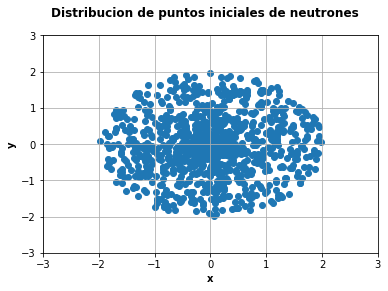

In [2]:
def generar_neutrones(N_neutrones,radio):

    #Inicializamos las posiciones iniciales de los neutrones dentro de la esfera
    # Generamos dos coordenadas (r,theta) y luego a traves de las propiedades trigonometricas
    # luego convertimos estas coordenadas polares a cartesianas.
    r0 = np.random.uniform(0,radio,size=N_neutrones)
    theta0 = np.random.uniform(0,2*np.pi-.01,size=N_neutrones)
    x0 = r0*np.cos(theta0)
    y0 = r0*np.sin(theta0)
    # Guardamos las posiciones iniciales dentro de un arreglo para uso posterior
    fission_sites = np.array([x0,y0]).T
    return fission_sites
r = 2
Posiciones = generar_neutrones(1000,r)

plt.figure()
plt.suptitle('Distribucion de puntos iniciales de neutrones',fontweight='bold')
plt.scatter(Posiciones[:,0],Posiciones[:,1])
plt.xlabel('x',fontweight='bold')
plt.ylabel('y',fontweight='bold')
plt.xlim(-r-1,r+1)
plt.ylim(-r-1,r+1)
plt.grid()

Durante el transporte de un neutrón, este puede ser absorbido, desviado o ocasionar una fisión. Si el sistema es supercrítico el programa colapsará debido a límites de memoria ya que en cada ciclo de transporte habra más y más neutrones que seguir. Para evitar esto asignaremos pesos a los neutrones, con los cuales simbolizaremos el aumento o disminución de la cantidad de neutrones.

\\

Al final de cada ciclo, contamos el número de fisiones producidas y la posición de interacción. En el siguiente ciclo iniciamos nuevos neutrones desde estos punto de interacción y seguimos su evolución. Tomando el cociente entre los pesos de los neutrones de un ciclo entre el ciclo previo podemos obtener $K_\mathrm{eff}$

\\

Necesitamos ahora un código que mueva un neutrón aleatoreamente por el espacio:

Para el transporte debemos considerar $\Sigma_a$, $\Sigma_t$, $\Sigma_f$ y $\nu$

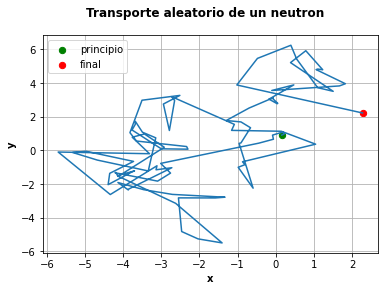

In [3]:
def random_transport(x,y,Sigma_t,niter):
  pos = [[x,y]]
  for i in range(niter):
    new_r = -np.log(1-np.random.random())/Sigma_t # Ya que tenemos solo una distancia promedio necesitamos muestrear las distancias
    new_theta = np.random.uniform(0,2*np.pi-.01) # Muestramos aleatoriamente un angulo
    x += new_r*np.cos(new_theta)
    y += new_r*np.sin(new_theta)
    pos.append([x,y])
  return pos
  
Posiciones = random_transport(np.random.random(),np.random.random(),1,100)
Posiciones = np.array(Posiciones)
plt.figure()
plt.suptitle('Transporte aleatorio de un neutron',fontweight='bold')
plt.plot(Posiciones[:,0],Posiciones[:,1])
plt.scatter(Posiciones[0,0],Posiciones[0,1],label='principio',s=40,c='g')
plt.scatter(Posiciones[-1,0],Posiciones[-1,1],label='final',s=40,c='r')
plt.xlabel('x',fontweight='bold')
plt.ylabel('y',fontweight='bold')
plt.grid()
plt.legend()

  

Ahora necesitamos una lógica para determinar si el neutrón interactúa o no.
Para esto hacemos uso de las secciones eficaces macroscópicas.
 
\\
Como hemos visto, para generar muestras de una distribución debemos invertir la ***funcion de densidad cumulativa***. En casos como el nuestro en los cuales esta función no es conocida, tenemos que usar otros métodos para generar muestras.

El mecanismo que usaremos es el ***rejection sampling***. En terminos sencillos consiste en generar un número aleatorio y compararlo a la probabilidad de que ocurra algun evento. Si la probabilidad es menor, el evento ocurre, si es mayor el evento no ocurre y se procede a evaluar si otro evento distinto ocurrió mediante el mismo mecanismo.

\\
\begin{align}
\alpha \in U[0,1] \rightarrow p(\alpha) \begin{cases} 
1    &\text{si } \alpha \leq \dfrac{p_\mathrm{evento}}{p_\mathrm{total}} \\
0    &\text{si } \alpha > \dfrac{p_\mathrm{evento}}{p_\mathrm{total}}\\
\end{cases}
\end{align}

\\

Ahora escribimos un código que tome esto en cuenta, lo usaremos para estudiar si durante el trayecto el neutrón colisiona y es desviado, es absorbido o produce fisión.

\\




In [4]:
def random_transport(x,y,Sigma_t,Sigma_a,Sigma_f,niter):
  # Calculamos la seccion eficaz macroscopica de desvio
  Sigma_s = Sigma_t - Sigma_a
  Pos = [[x,y]]
  alive = 1 # Usamos esta variable como un flag para determinar si debemos continuar siguiendo la evolucion de la particula
  Fision = 0
  while alive == 1: 
    for i in range(niter):
      new_r = -np.log(1-np.random.random())/Sigma_t # Ya que tenemos solo una distancia promedio necesitamos muestrear las distancias
      new_theta = np.random.uniform(0,2*np.pi-.01) # Muestramos aleatoriamente un angulo
      x += new_r*np.cos(new_theta)
      y += new_r*np.sin(new_theta)
      Pos.append([x,y])

      # Verificamos si ocurre una interaccion:
      coll_prob= np.random.random()
      if coll_prob <= Sigma_s/Sigma_t: # La fraccion de la probabidad total de interaccion que ocurra un desvio 
        continue # No debemos cambiar nada, proseguimos con la siguiente iteracion.
      else:
        # No hubo desvio (scattering), estudiamos ahora si hubo fision o simple absorcion
        fiss_prob = np.random.random()
        alive = 0
        if fiss_prob <= Sigma_f/Sigma_a:
          Fision = 1
          print(f'Ha ocurrido una fision tras {i+1} iteraciones')
          return Pos
        else:
          print(f'El neutron ha sido absorbido tras {i+1} iteraciones')
          return Pos
  return Pos

El neutron ha sido absorbido tras 2 iteraciones


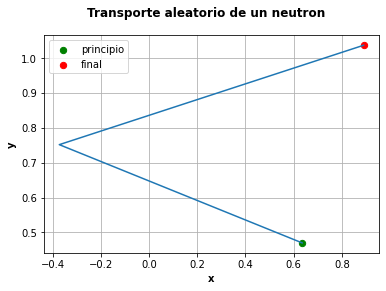

In [5]:
Posiciones = random_transport(np.random.random(),np.random.random(),1,0.3,0.1,100)
Posiciones = np.array(Posiciones)
plt.figure()
plt.suptitle('Transporte aleatorio de un neutron',fontweight='bold')
plt.plot(Posiciones[:,0],Posiciones[:,1])
plt.scatter(Posiciones[0,0],Posiciones[0,1],label='principio',s=40,c='g')
plt.scatter(Posiciones[-1,0],Posiciones[-1,1],label='final',s=40,c='r')
plt.xlabel('x',fontweight='bold')
plt.ylabel('y',fontweight='bold')
plt.grid()
plt.legend()


Solo nos falta crear un loop grande que genere ciclos de transporte con los neutrones

\\

El algoritmo que queremos debe:



1.   Generar un grupo de N neutrones distribuidos al azar en el espacio
2.   Seguir la evolución de cada neutron
3.   Al final del ciclo tomar nota de los lugares del espacio donde hubo una interacción y ajustar el vector de pesos de manera proporcional al número de fisiones occuridas.
4.   Comenzar el siguiente ciclo g con N neutrones distribuidos entre los puntos de interacción del ciclo previo.

<h2> Nota: <h2>

Como todo algoritmo numírico, es probable que el valor estimado de $K_\mathrm{eff}$ varíe de un ciclo a otro. Ademas, ya que no tenemos la CDF subyacente de las interacciones y la aproximamos a traves de ***rejection sampling***, es necesario realizar varias iteraciones hasta que la distribución de probabilidad de interacción se vuelva estacionaria y converja asintóticamente a la distribución real. Para esto consideramos un número de ciclos extras, los cuales no consideraremos válidos para estimar $K_\mathrm{eff}$

(Si has visto Cadenas de Markov, esta noción te parecera familiar a la del ***burn in*** de la traza)


### Estimando K_eff

Reordenando y combinando lo que hemos escrito:

In [6]:
def homog_sphere_k(N,Sig_t,Sig_f,Sig_a,nu,radio,inactive_cycles = 5, active_cycles = 20):
    
    Sig_s = Sig_t-Sig_a # Calculamos la seccion eficaz macroscopica de desvio

    #Inicializamos las posiciones iniciales de los neutrones dentro de la esfera
    # Generamos dos coordenadas (r,theta) y luego a traves de las propiedades trigonometricas
    # luego convertimos estas coordenadas polares a cartesianas.
    r0 = np.random.uniform(0,radio,size=N)
    theta0 = np.random.uniform(0,2*np.pi-.01,size=N)
    x0 = r0*np.cos(theta0)
    y0 = r0*np.sin(theta0)
    # Guardamos las posiciones iniciales dentro de un arreglo para uso posterior
    fission_sites = np.array([x0,y0]).T
    posiciones = fission_sites.copy()
    # Inicializamos un vector de pesos asignando el numero medio de neutrones por fision
    weights = nu*np.ones(N)
    old_gen = np.sum(weights)
    k = np.zeros(inactive_cycles+active_cycles)

    Fs = {}

    for cycle in tqdm(range(inactive_cycles+active_cycles)):
        fission_sites = np.empty((1,2)) # Creamos un array vacio 1x2
        fission_site_weights = np.empty(1) # Creamos un array vacio 1x1
        for neut in range(weights.size):
            #Tomamos un neutron de la lista de neutrones
            posicion = posiciones[neut] # posicion del neutron
            weight = weights[neut] # peso asociado
            alive = 1 # Indicamos que esta 'vivo' y hay que seguir su evolucion
            while (alive):
                # Muestramos la distancia a la proxima colision
                new_r = -np.log(1-np.random.random())/Sig_t # Ya que tenemos solo una distancia promedio necesitamos muestrear las distancias
                new_theta = np.random.uniform(0,2*np.pi-.01) # Muestramos aleatoriamente un angulo
                # Actualizamos la posicion del neutron
                posicion[0] += new_r*np.cos(new_theta)
                posicion[1] += new_r*np.sin(new_theta)
                # Verificamos si aun estamos dentro de la esfera
                if (posicion[0]**2 + posicion[1]**2) > radio**2:
                    alive = 0 # El neutron ha salido de la esfera, dejamos de seguirlo
                else:
                    # Tomamos una muestra de la probabilidad de interaccion
                    coll_prob = np.random.random()
                    if (coll_prob < Sig_s/Sig_t):
                      # Si la probabilidad es menor que la probabilidad de desvio el neutron no interactuo,
                      # recalculamos la distancia hasta la siguiente colision
                        continue
                    else:
                      # Si el neutron colisiono, pudo haber ocasinado una fision o ser absorvido
                      # para esto tomamos una muestra de la probabilidad de fision
                        fiss_prob = np.random.random()
                        alive = 0 # 
                        if (fiss_prob <= Sig_f/Sig_a):
                          # Si la probabilidad de fision es menor o igual al cociente 
                          # entre las secciones eficaces macroscopicas, consideramos que ocurre una fission 
                          # en la posicion actual

                            # agregamos la posicion actual al arreglo de los lugares de fision
                            fission_sites = np.vstack((fission_sites,posicion.reshape(-1,1).T))
                            # agregamos el peso de la particula correspondiente al arreglo de pesos
                            fission_site_weights = np.append(fission_site_weights,weight)
                          # En caso de no haber fision, el neutron es absorbido. En nuestra approximacion 
                          # no hacemos nada, sin embargo para mayor fidelidad, deberiamos actualizar la composicion
                          # atomica del medio y ajustar las correspondientes secciones eficaces.

        # Finalizamos un ciclo

        # Borramos la primera entrada del arreglo ya que contiene datos dummy
        fission_sites = np.delete(fission_sites,0,axis=0)
        # Realizamos el mismo procedimiento para este otro arreglo
        fission_site_weights = np.delete(fission_site_weights,0,axis=0)
        Fs[str(cycle)] = fission_sites
        # Determinamos el numero de neutrones a inicializar en el proximo ciclo 
        # desde los puntos de interaccion determinados en el ciclo anterior
        num_per_site = int(np.ceil(N/fission_sites.shape[0]))
        # Reiniciamos el vector de posiciones de las particulas:
        posiciones = np.empty((1,2))
        weights = np.empty(1)
        # Creamos los nuevos arreglos de posiciones y pesos para usarlos en el proximo ciclo
        for site in range(fission_sites.shape[0]):
            site_pos = fission_sites[site]
            site_weight = fission_site_weights[site]
            posiciones = np.vstack((posiciones,
            site_pos*np.ones((num_per_site,1))))
            weights = np.append(weights,
            site_weight * nu/num_per_site*np.ones((num_per_site,1)))
        # Borramos la primera entrada de los arreglos al igual que hicimos arriba
        posiciones = np.delete(posiciones,0,axis=0) 
        weights = np.delete(weights,0,axis=0) 
        # Estimamos el numero de neutrones producidos en la generacion actual
        new_gen = np.sum(weights)
        # Calculamos el valor de Keff correspondiente para el ciclo actual
        k[cycle] = new_gen/old_gen 
        old_gen = new_gen
    return k, Fs

Ahora aplicamos nuestro cídigo a una esfera de radio 3cm usando los siguientes parámetros:

* $\Sigma_t = $ `0.3382197087866109`
* $\Sigma_f = $ `0.0920156560669456`
* $\Sigma_a = $ `0.1049475861087866`
* $\nu = $ `2.98`
* $N$ = `50e3` neutrones por ciclo
* Ciclos Activos = `100`
* Ciclos Inactivos = `10`

In [12]:
St = 0.3382197087866109
Sf = 0.0920156560669456
Sa = 0.1049475861087866
nu = 2.98
r = 3
Nciclos_act = 100
Nciclos_inact = 10
N_neutrones = 50000

K, Fs = homog_sphere_k(N_neutrones,St,Sf,Sa,nu,r,Nciclos_inact,Nciclos_act)
Kmean = np.mean(K[Nciclos_inact:])
Kstd = np.std(K[Nciclos_inact:])
print('Keff = {:.4f} +/- {:.4f}'.format(Kmean,Kstd))

100%|██████████| 110/110 [05:42<00:00,  3.12s/it]

Keff = 0.6910 +/- 0.0058


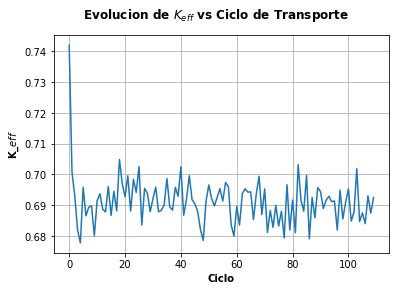

In [14]:
plt.figure()
plt.suptitle(r'Evolucion de $K_{eff}$ vs Ciclo de Transporte',fontweight='bold')
plt.plot(np.arange(Nciclos_act+Nciclos_inact),K)
plt.ylabel(r'K_${eff}$',fontweight='bold')
plt.xlabel('Ciclo',fontweight='bold')
plt.grid()


# Tarea

* Determine el radio crítico de una esfera de $^{239}\mathrm{Pu}$. Cual es la masa crítica?

* Modifique el cídigo para considerar ahora una esfera hueca con radio interior $R_{in}$ y radio exterior $R_{ext}$. Determine valores de estos radios para que el sistema sea crítico a densidad normal.

Version 1.0, Autor : Antonio Figueroa

In [9]:
#libs summary
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'IPython.core.shadowns',
 'numpy',
 'matplotlib.pyplot',
 'types']